In [1]:
%matplotlib inline


# 1D Wasserstein barycenter demo

This example illustrates the computation of regularized Wassersyein Barycenter
as proposed in [3].


[3] Benamou, J. D., Carlier, G., Cuturi, M., Nenna, L., & Peyré, G. (2015).
Iterative Bregman projections for regularized transportation problems
SIAM Journal on Scientific Computing, 37(2), A1111-A1138.


In [2]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

# sphinx_gallery_thumbnail_number = 1

import numpy as np
import matplotlib.pyplot as plt
import ot
# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection

## Generate data



In [3]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a1 = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
a2 = ot.datasets.make_1D_gauss(n, m=60, s=8)

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

## Barycenter computation



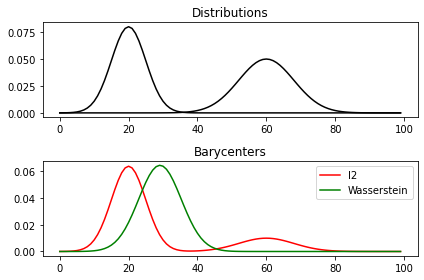

In [4]:
alpha = 0.2  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

f, (ax1, ax2) = plt.subplots(2, 1, tight_layout=True, num=1)
ax1.plot(x, A, color="black")
ax1.set_title('Distributions')

ax2.plot(x, bary_l2, 'r', label='l2')
ax2.plot(x, bary_wass, 'g', label='Wasserstein')
ax2.set_title('Barycenters')

plt.legend()
plt.show()

Barycentric interpolation
 -------------------------
%% barycenter interpolation



In [5]:
n_alpha = 11
alpha_list = np.linspace(0, 1, n_alpha)


B_l2 = np.zeros((n, n_alpha))

B_wass = np.copy(B_l2)

for i in range(n_alpha):
    alpha = alpha_list[i]
    weights = np.array([1 - alpha, alpha])
    B_l2[:, i] = A.dot(weights)
    B_wass[:, i] = ot.bregman.barycenter(A, M, reg, weights)

/anaconda/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  # Remove the CWD from sys.path while we load stuff.
/anaconda/envs/rl/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


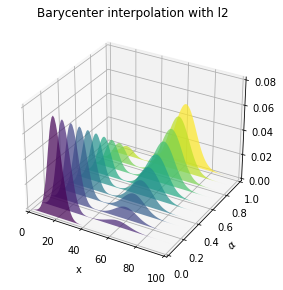

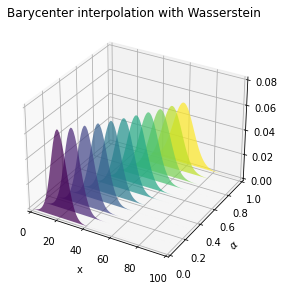

In [6]:
plt.figure(2)

cmap = plt.cm.get_cmap('viridis')
verts = []
zs = alpha_list
for i, z in enumerate(zs):
    ys = B_l2[:, i]
    verts.append(list(zip(x, ys)))

ax = plt.gcf().gca(projection='3d')

poly = PolyCollection(verts, facecolors=[cmap(a) for a in alpha_list])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('x')
ax.set_xlim3d(0, n)
ax.set_ylabel('$\\alpha$')
ax.set_ylim3d(0, 1)
ax.set_zlabel('')
ax.set_zlim3d(0, B_l2.max() * 1.01)
plt.title('Barycenter interpolation with l2')
plt.tight_layout()

plt.figure(3)
cmap = plt.cm.get_cmap('viridis')
verts = []
zs = alpha_list
for i, z in enumerate(zs):
    ys = B_wass[:, i]
    verts.append(list(zip(x, ys)))

ax = plt.gcf().gca(projection='3d')

poly = PolyCollection(verts, facecolors=[cmap(a) for a in alpha_list])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')
ax.set_xlabel('x')
ax.set_xlim3d(0, n)
ax.set_ylabel('$\\alpha$')
ax.set_ylim3d(0, 1)
ax.set_zlabel('')
ax.set_zlim3d(0, B_l2.max() * 1.01)
plt.title('Barycenter interpolation with Wasserstein')
plt.tight_layout()

plt.show()